# Herkenning van olifanten met CNNs

Stijn Oomes

woensdag 12 oktober 2022


## Importeer libraries

In [2]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.image import imread

import tensorflow as tf
from tensorflow import keras

2023-01-11 10:37:50.706348: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Laad en toon afbeeldingen van olifanten

In [4]:
from glob import glob
my_jpgs = glob('*.jpg')
print(my_jpgs)

['olifant_foto4.jpg', 'pixellib_example.jpg', 'olifant_foto3.jpg', 'claxon_iphone_log.jpg', 'olifant_foto2.jpg', 'claxon_michiel_log.jpg', 'olifant_foto1.jpg', 'claxon_close.jpg', 'claxon_close_log.jpg', 'kat_foto1.jpg', 'road.jpg', 'olifant_tekening1.jpg', 'groep2.jpg', 'olifant_tekening2.jpg', 'olifant_tekening3.jpg', 'olifant_tekening4.jpg', 'groep.jpg', 'newimage.jpg', 'olifant_speelgoed1.jpg', 'claxon_1m_log.jpg', 'output.jpg', 'road2.jpg', 'claxon_1m.jpg', 'Zebra_Zuid-Afrika.jpg']


(10, 224, 224, 3)



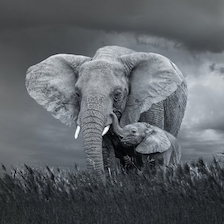
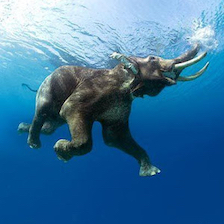
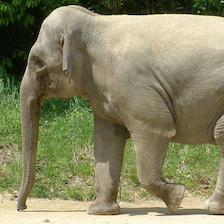
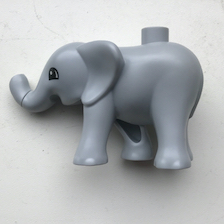
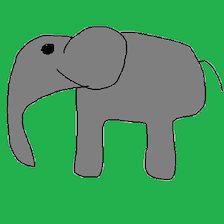
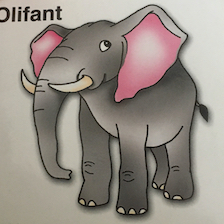
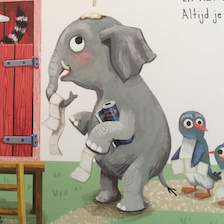
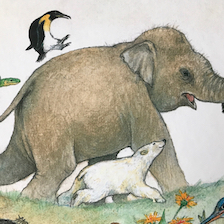
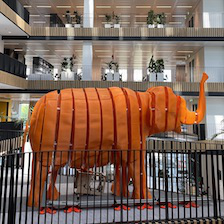
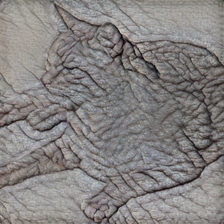


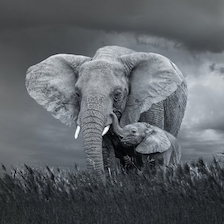
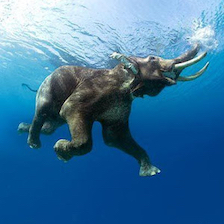
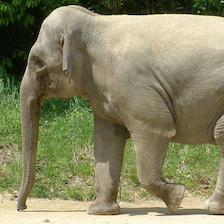
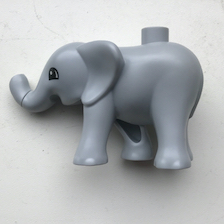
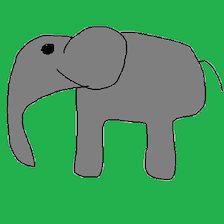
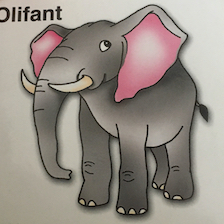
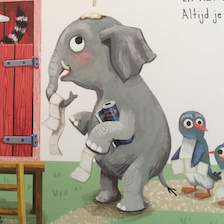
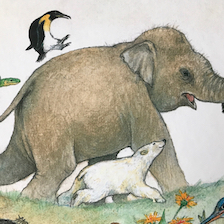
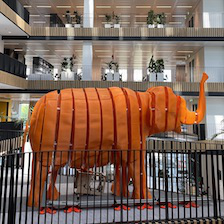
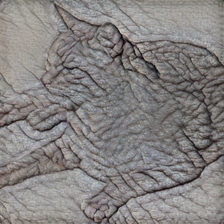

In [5]:
import ipyplot
olifant1 = imread("olifant_foto1.jpg") 
olifant2 = imread("olifant_foto2.jpg") 
olifant3 = imread("olifant_foto3.jpg") 
olifant4 = imread("olifant_speelgoed1.jpg") 
olifant5 = imread("olifant_tekening1.jpg") 
olifant6 = imread("olifant_tekening2.jpg") 
olifant7 = imread("olifant_tekening3.jpg") 
olifant8 = imread("olifant_tekening4.jpg") 
olifant9 = imread("olifant_foto4.jpg") 
olifant10 = imread("kat_foto1.jpg")

images = np.array([olifant1, olifant2, olifant3, olifant4, olifant5, olifant6, olifant7, olifant8, olifant9, olifant10])

batch_size, height, width, channels = images.shape
print(images.shape)


ipyplot.plot_images(images, max_images=len(images), img_width=150)

## Laad voor-getraind model

zie https://keras.io/api/applications/


In [6]:
model = keras.applications.resnet50.ResNet50(weights="imagenet")

2023-01-11 10:38:24.148764: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Bepaal classificatie van de afbeeldingen met ResNet50

1/1 [==============================] - 2s 2s/step


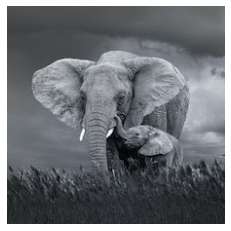

Image #0
  n02504458 - African_elephant 81.85%

  n01871265 - tusker       9.64%

  n02412080 - ram          3.16%

  n02415577 - bighorn      2.96%

  n02504013 - Indian_elephant 2.02%



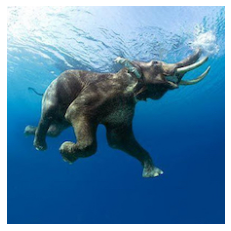

Image #1
  n10565667 - scuba_diver  68.42%

  n02074367 - dugong       4.59%

  n04251144 - snorkel      4.58%

  n09256479 - coral_reef   3.09%

  n01494475 - hammerhead   2.37%



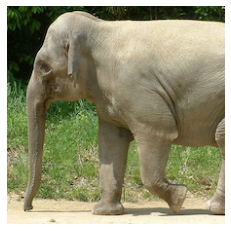

Image #2
  n02504013 - Indian_elephant 96.99%

  n01871265 - tusker       1.95%

  n02504458 - African_elephant 0.95%

  n01704323 - triceratops  0.06%

  n02398521 - hippopotamus 0.01%



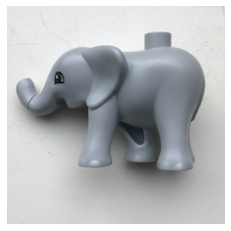

Image #3
  n03935335 - piggy_bank   55.65%

  n03908714 - pencil_sharpener 27.55%

  n04131690 - saltshaker   3.83%

  n04254120 - soap_dispenser 2.95%

  n03598930 - jigsaw_puzzle 1.00%



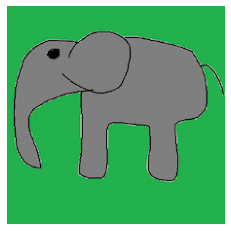

Image #4
  n02165105 - tiger_beetle 17.70%

  n03291819 - envelope     12.31%

  n07248320 - book_jacket  9.92%

  n03595614 - jersey       9.31%

  n06596364 - comic_book   5.49%



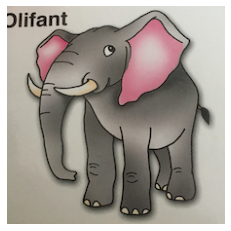

Image #5
  n02910353 - buckle       33.05%

  n06596364 - comic_book   10.24%

  n04548280 - wall_clock   8.27%

  n03724870 - mask         5.57%

  n03063599 - coffee_mug   3.71%



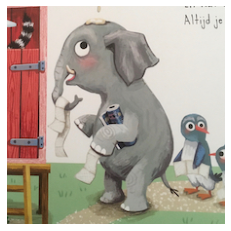

Image #6
  n03887697 - paper_towel  37.64%

  n04399382 - teddy        11.58%

  n04458633 - totem_pole   7.00%

  n04462240 - toyshop      5.72%

  n04070727 - refrigerator 5.45%



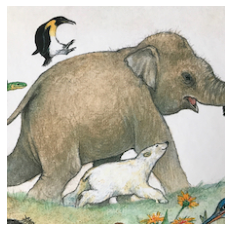

Image #7
  n02504013 - Indian_elephant 34.03%

  n02504458 - African_elephant 30.31%

  n02113978 - Mexican_hairless 9.10%

  n02129165 - lion         6.36%

  n01871265 - tusker       2.74%



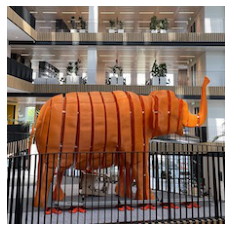

Image #8
  n02112137 - chow         21.57%

  n03590841 - jack-o'-lantern 12.78%

  n03662601 - lifeboat     4.44%

  n02795169 - barrel       4.42%

  n02108551 - Tibetan_mastiff 3.56%



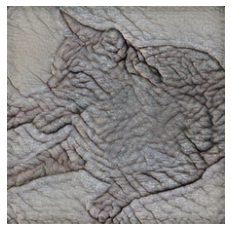

Image #9
  n02504458 - African_elephant 52.09%

  n02504013 - Indian_elephant 32.43%

  n01871265 - tusker       15.48%

  n01704323 - triceratops  0.00%

  n02397096 - warthog      0.00%



In [7]:
inputs = keras.applications.resnet50.preprocess_input(images)

Y_proba = model.predict(inputs, steps=1)

top_K = keras.applications.resnet50.decode_predictions(Y_proba, top=5)

for image_index in range(len(images)):
    plt.imshow(images[image_index, :, :, :])
    plt.axis("off") 
    plt.show()
    
    print("Image #{}".format(image_index))
    for class_id, name, y_proba in top_K[image_index]:
        print("  {} - {:12s} {:.2f}%".format(class_id, name, y_proba * 100))
        print()